# Quantum Mechanics Tools
## Section 4: Basis set convergence of molecular properties: Geometry and Vibrational Frequency

__Questions__

Do the calculated molecular properties of a molecule converge with increasing basis set size?

__Objectives__

Perform geometry optimization calculations.

Perform frequency calculations.

Plot the value of a molecular property vs. basis set.

### Overview

In this exercise we will perform geometry optimization and vibrational frequency analysis of a small molecule using three different basis sets of increasing size. __Theoretically the molecular geometry and vibrational frequencies should converge as the size of the basis set increases__. We’ll see if this is true!

For this exercise we will start by looking at the geometry and vibrational frequencies of a simple linear molecule, carbon dioxide (CO2). This exercise is especially relevant because three of CO2’s four vibrational modes – or two of its three vibrational frequencies (because two of the modes have the same frequency) – are excitable by the infrared radiation emitted by Earth’s surface and this is what makes CO2 a potent greenhouse gas on our planet.

In order for a vibrational mode to be excited by electromagnetic radiation, it must involve a change in the molecule’s dipole moment. A visualization of CO2’s vibrational modes is available here: http://www.chemtube3d.com/vibrationsco2/. Just by looking at the animations of the vibrational modes: which modes cause a change in the dipole moment of CO2? Do any of them have identical frequencies?

In [20]:
# Construct a CO2 molecule. You can use a molecular visualization program like Avogadro, 
#create your own set of x,y,z coordinates, or use a z-matrix specification.
CO2='''
   O        1.50091        0.02113        0.55444
   C        2.69791        0.02113        0.55444
   O        3.89491        0.02113        0.55444
'''

In [21]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# Next, set up the molecule for your calculation. Don’t forget to include your molecular charge and multiplicity!
psi4.set_memory('2 GB')
psi4.set_num_threads(2)

co2 = psi4.geometry("""
symmetry c1
0 1
   O        1.50091        0.02113        0.55444
   C        2.69791        0.02113        0.55444
   O        3.89491        0.02113        0.55444
""")

### Geometry optimization and vibrational frequency analysis

Optimize the geometry of the molecule to ensure it is at its minimum energy conformation.

In [23]:
psi4.set_output_file('co2_geomopt_HF-DZ.dat', False)
psi4.set_options({'g_convergence': 'gau_tight'}) # this forces the optimizer to get close to the minimum
psi4.optimize('scf/cc-pVDZ', molecule=co2, dertype='gradient')

Optimizer: Optimization complete!


-187.6525093705127

Let’s look at the molecular geometry after optimization and compute the C-O bond length “by hand”, i.e., taking {x,y,z} coordinates for one of the O atoms and the C atom and computing the Euclidean distance between them.

In [24]:
scf_dz_xyz = 0.529177*np.array(co2.geometry()) # the factor of 0.529177 converts from Bohr to Ångstrom
print('The atomic coordinates after optimization are:\n', scf_dz_xyz)

scf_dz_bondlen = np.linalg.norm(scf_dz_xyz[1,:]-scf_dz_xyz[0,:]) # look up NumPy's linalg.norm() function!
print('The C-O bond length after optimization is:\n', scf_dz_bondlen)

The atomic coordinates after optimization are:
 [[-1.14054949e+00 -3.99426946e-16 -3.93944135e-17]
 [ 1.33102605e-11  1.06479998e-15  1.05018380e-16]
 [ 1.14054949e+00 -3.99426945e-16 -3.93944134e-17]]
The C-O bond length after optimization is:
 1.1405494880972522


The command below will execute a vibrational frequency analysis (requiring calculation of the Hessian) for this molecule. We will request that Psi4 approximate the Hessian by calculating finite differences of the gradient. This method is often faster than directly calculating the Hessian, and second derivatives of the energy are often unavailable for various quantum chemistry methods.

In [25]:
psi4.set_output_file('co2_vibfreq_HF-DZ.dat', False)
scf_dz_energy, scf_dz_wfn = psi4.frequency('scf/cc-pVDZ', molecule=co2, return_wfn=True, dertype='gradient')

 9 displacements needed.
 1 2 3 4 5 6 7 8 9


For a linear molecule, we expect there to be 3N-5 normal modes (and therefore normal mode frequencies). In the case of CO 2 , we expect (3x3) - 5 = 4 normal modes. We will print the computed vibrational frequencies out below.

In [26]:
for i in range(4):
    print(scf_dz_wfn.frequencies().get(0,i))

761.2916604243464
761.2916607452489
1513.3236107614903
2580.2656370105105


It looks like the first two frequencies are identical (as suggested by our resource: http://www.chemtube3d.com/vibrationsCO2.htm). Let’s exclude the first one from the list of frequencies that we’ll store.

In [27]:
scf_dz_vibfreq = [] # make an empty list to store frequencies

for i in range(3):
    scf_dz_vibfreq.append(scf_dz_wfn.frequencies().get(0,i+1))

print(scf_dz_vibfreq)

[761.2916607452489, 1513.3236107614903, 2580.2656370105105]


In [28]:
#Using the commands you learned above, calculate the vibrational frequencies of CO2 
#using the cc-pVTZ and cc-pVQZ basis sets.

#cc-pVTZ
psi4.set_output_file('co2_geomopt_HF-TZ.dat', False)
psi4.set_options({'g_convergence': 'gau_tight'}) # this forces the optimizer to get close to the minimum
psi4.optimize('scf/cc-pVTZ', molecule=co2, dertype='gradient')

Optimizer: Optimization complete!


-187.70972765882868

In [29]:
scf_tz_xyz = 0.529177*np.array(co2.geometry()) # the factor of 0.529177 converts from Bohr to Ångstrom
print('The atomic coordinates after optimization are:\n', scf_tz_xyz)

scf_tz_bondlen = np.linalg.norm(scf_tz_xyz[1,:]-scf_tz_xyz[0,:]) # look up NumPy's linalg.norm() function!
print('The C-O bond length after optimization is:\n', scf_tz_bondlen)

The atomic coordinates after optimization are:
 [[-1.13624510e+00 -1.65446072e-15 -1.26021758e-15]
 [ 1.57591711e-12  4.41049300e-15  3.35951209e-15]
 [ 1.13624510e+00 -1.65446072e-15 -1.26021758e-15]]
The C-O bond length after optimization is:
 1.136245096423586


In [30]:
psi4.set_output_file('co2_vibfreq_HF-TZ.dat', False)
scf_tz_energy, scf_tz_wfn = psi4.frequency('scf/cc-pVTZ', molecule=co2, return_wfn=True, dertype='gradient')

 9 displacements needed.
 1 2 3 4 5 6 7 8 9


In [31]:
for i in range(4):
    print(scf_tz_wfn.frequencies().get(0,i))
    
scf_tz_vibfreq = [] # make an empty list to store frequencies

for i in range(3):
    scf_tz_vibfreq.append(scf_tz_wfn.frequencies().get(0,i+1))

print(scf_tz_vibfreq)

772.8343843195363
772.83438470624
1511.0887605949627
2564.2978458113544
[772.83438470624, 1511.0887605949627, 2564.2978458113544]


In [32]:
# cc-pVQZ
psi4.set_output_file('co2_geomopt_HF-QZ.dat', False)
psi4.set_options({'g_convergence': 'gau_tight'}) # this forces the optimizer to get close to the minimum
psi4.optimize('scf/cc-pVQZ', molecule=co2, dertype='gradient')

Optimizer: Optimization complete!


-187.7247082553985

In [33]:
scf_qz_xyz = 0.529177*np.array(co2.geometry()) # the factor of 0.529177 converts from Bohr to Ångstrom
print('The atomic coordinates after optimization are:\n', scf_qz_xyz)

scf_qz_bondlen = np.linalg.norm(scf_qz_xyz[1,:]-scf_qz_xyz[0,:]) # look up NumPy's linalg.norm() function!
print('The C-O bond length after optimization is:\n', scf_qz_bondlen)

The atomic coordinates after optimization are:
 [[-1.13449353e+00  1.23960623e-15  4.00094723e-16]
 [ 3.88308624e-10 -3.30456596e-15 -1.06658016e-15]
 [ 1.13449353e+00  1.23960623e-15  4.00094725e-16]]
The C-O bond length after optimization is:
 1.13449352597201


In [34]:
psi4.set_output_file('co2_vibfreq_HF-QZ.dat', False)
scf_qz_energy, scf_qz_wfn = psi4.frequency('scf/cc-pVQZ', molecule=co2, return_wfn=True, dertype='gradient')

 9 displacements needed.
 1 2 3 4 5 6 7 8 9


In [35]:
for i in range(4):
    print(scf_qz_wfn.frequencies().get(0,i))
    
scf_qz_vibfreq = [] # make an empty list to store frequencies

for i in range(3):
    scf_qz_vibfreq.append(scf_qz_wfn.frequencies().get(0,i+1))

print(scf_qz_vibfreq)

776.6993438369694
776.6993456124814
1511.4424274694527
2555.4343702041083
[776.6993456124814, 1511.4424274694527, 2555.4343702041083]


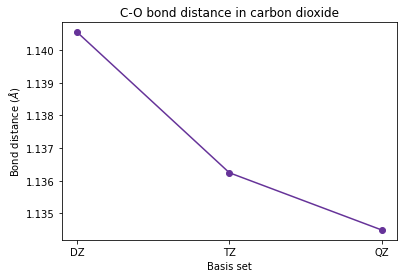

In [38]:
# Plot the C-O bond length and the vibrational frequencies vs. basis set size.
#bond distnce
plt.plot([1, 2, 3], [scf_dz_bondlen, scf_tz_bondlen, scf_qz_bondlen],
         marker='o', color='RebeccaPurple')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Bond distance ($\AA$)')
plt.title('C-O bond distance in carbon dioxide')
plt.savefig('co2-bond-distance.png',dpi=300)
plt.show()

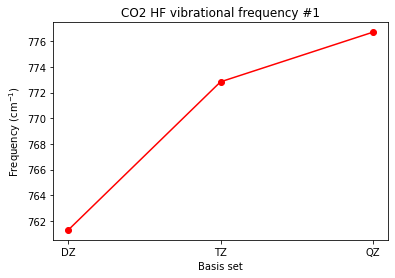

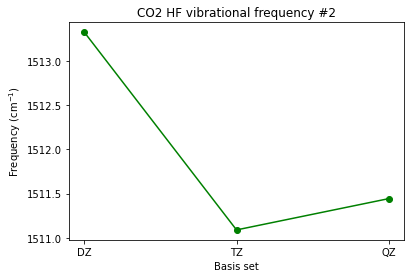

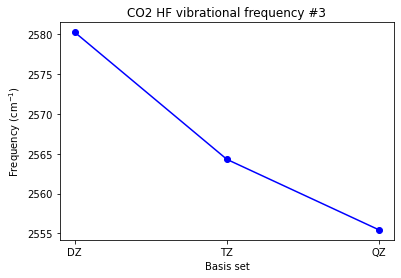

In [45]:
# plot vibrational frequencies
# first one
plt.plot([1, 2, 3], [scf_dz_vibfreq[0], scf_tz_vibfreq[0],  scf_qz_vibfreq[0]],
         marker='o', color='red')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Frequency (cm$^{-1}$)')
plt.title(r'CO2 HF vibrational frequency #1')
plt.savefig('vib_freq_1.png',dpi=300)
plt.show()

# second one

plt.plot([1, 2, 3], [scf_dz_vibfreq[1], scf_tz_vibfreq[1],  scf_qz_vibfreq[1]],
         marker='o', color='green')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Frequency (cm$^{-1}$)')
plt.title(r'CO2 HF vibrational frequency #2')
plt.savefig('vib_freq_2.png',dpi=300)
plt.show()

# thrid one

plt.plot([1, 2, 3], [scf_dz_vibfreq[2], scf_tz_vibfreq[2],  scf_qz_vibfreq[2]],
         marker='o', color='blue')
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel(r'Frequency (cm$^{-1}$)')
plt.title(r'CO2 HF vibrational frequency #3')
plt.savefig('vib_freq_3.png',dpi=300)
plt.show()

### Comparing your results to experiment

To compare your results to experiment, you could create a plot of the percent errors in the vibrational frequencies with respect to experiment. Note that this will require you to use the experimental data and scale factors from the NIST CCCBDB web pages listed above. Here is some starting code.

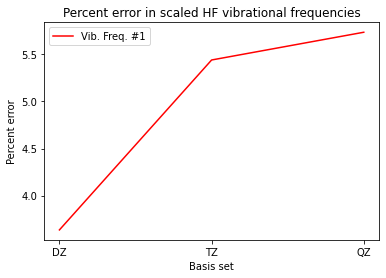

In [46]:
scaled_vibfreq1 = np.array([0.908*scf_dz_vibfreq[0], 0.910*scf_tz_vibfreq[0], 0.908*scf_qz_vibfreq[0]])
### two more lines with new variables for the other two frequencies ###

plt.plot([1, 2, 3], 100*(scaled_vibfreq1 - 667)/667, label='Vib. Freq. #1', color='red')
### two more lines with calls to plt.plot for the other two frequencies ###
plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel('Percent error')
plt.title('Percent error in scaled HF vibrational frequencies')
plt.legend()
plt.show()

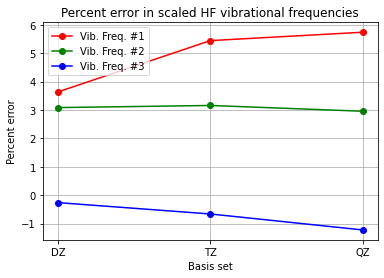

In [183]:
# 667, 2349.0 and 1333.0 are the expermintal values
scaled_vibfreq1 = np.array([0.908*scf_dz_vibfreq[0], 0.910*scf_tz_vibfreq[0], 0.908*scf_qz_vibfreq[0]])
scaled_vibfreq2 = np.array([0.908*scf_dz_vibfreq[1], 0.910*scf_tz_vibfreq[1], 0.908*scf_qz_vibfreq[1]])
scaled_vibfreq3 = np.array([0.908*scf_dz_vibfreq[2], 0.910*scf_tz_vibfreq[2], 0.908*scf_qz_vibfreq[2]])


plt.plot([1, 2, 3], 100*(scaled_vibfreq1 - 667)/667,'o-', label='Vib. Freq. #1', color='red')
plt.plot([1, 2, 3], 100*(scaled_vibfreq2 - 1333)/1333, 'o-',label='Vib. Freq. #2', color='green')
plt.plot([1, 2, 3], 100*(scaled_vibfreq3 - 2349)/2349, 'o-',label='Vib. Freq. #3', color='blue')


plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel('Percent error')
plt.title('Percent error in scaled HF vibrational frequencies')
plt.legend()
plt.grid()
plt.savefig('vib_freq_comparsion.png', dpi=300)
plt.show()

### Project Extension: Geometry Optimization and Frequency analysis with post-Hartree Fock Methods

You can now repeat this procedure to with DFT or MP2 to study the effects of electron correlation on your convergence. To do this, change all instances of scf to b3ylp (a very commonly used DFT functional) or mp2 (perhaps the most commonly used post-HF method). Either one of these is a reasonable first approach to accounting for the effects of electron correlation.

Does DFT/B3LYP or MP2 generate frequencies that are in better agreement with experiment than HF? To answer this question you’ll need to find the appropriate multiplicative scale factors to use with these methods.

In [68]:
# maybe later
file_dz=open('co2_dz.log','r')
file_qz=open('co2_qz.log','r')
file_tz=open('co2_tz.log','r')

freq_dz=[]
freq_qz=[]
freq_tz=[]

for line in file_dz:
    line=line.strip()
    if line.startswith('Frequencies'):
        word=line.split()
        freq_dz.append(float(word[2]))
        if len(word) > 3:
            freq_dz.append(float(word[4]))
        
        
for line in file_qz:
    line=line.strip()
    if line.startswith('Frequencies'):
        word=line.split()
        freq_qz.append(float(word[2]))
        if len(word) > 3:
            freq_qz.append(float(word[4]))
        

for line in file_tz:
    line=line.strip()
    if line.startswith('Frequencies'):
        word=line.split()
        freq_tz.append(float(word[2]))
        if len(word) > 3:
            freq_tz.append(float(word[4]))
                

        
print(freq_dz)
print(freq_qz)
print(freq_tz)

[654.9634, 1362.5022, 2421.6819]
[674.7774, 1372.1638, 2408.9314]
[671.6412, 1371.8938, 2417.233]


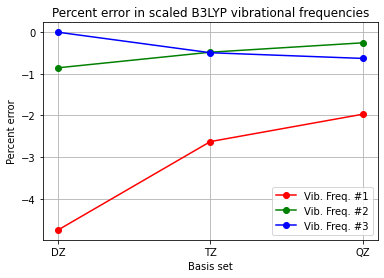

[635.314498  649.4770404 653.8593006]
[691.25282796 703.27929008 705.24300582]


In [184]:
#scaled_vibfreq1 = np.array([0.908*scf_dz_vibfreq[0], 0.910*scf_tz_vibfreq[0], 0.908*scf_qz_vibfreq[0]])
scaled_freq1 = np.array([0.970*freq_dz[0], 0.967*freq_tz[0], 0.969*freq_qz[0]])
scaled_freq2 = np.array([0.970*freq_dz[1], 0.967*freq_tz[1], 0.969*freq_qz[1]])
scaled_freq3 = np.array([0.970*freq_dz[2], 0.967*freq_tz[2], 0.969*freq_qz[2]])

#plt.plot([1, 2, 3], 100*(scaled_vibfreq1 - 667)/667, label='Vib. Freq. #1', color='red')
plt.plot([1, 2, 3], 100*(scaled_freq1 -667 )/667,'o-', label='Vib. Freq. #1', color='red')
plt.plot([1, 2, 3], 100*(scaled_freq2 -1333 )/1333, 'o-',label='Vib. Freq. #2', color='green')
plt.plot([1, 2, 3], 100*(scaled_freq3 -2349 )/2349, 'o-',label='Vib. Freq. #3', color='blue')


plt.xticks([1, 2, 3], ['DZ', 'TZ', 'QZ'])
plt.xlabel('Basis set')
plt.ylabel('Percent error')
plt.title('Percent error in scaled B3LYP vibrational frequencies')
plt.legend()
plt.grid()
plt.savefig('vib_freq_comparsion_B3LYP.png', dpi=300)
plt.show()

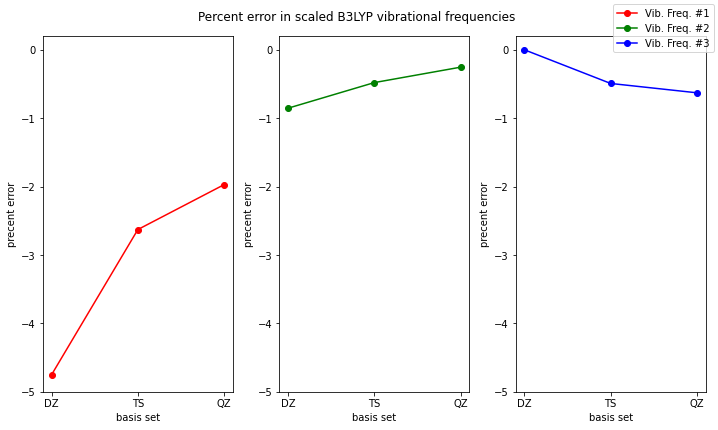

In [207]:
fig, ax = plt.subplots(1,3, figsize=(10,6))

a=['DZ','TS','QZ']
ax[0].plot(a, 100*(scaled_freq1 -667 )/667,'o-', label='Vib. Freq. #1', color='red')
ax[1].plot(a, 100*(scaled_freq2 -1333 )/1333,'o-', label='Vib. Freq. #2', color='green')
ax[2].plot(a, 100*(scaled_freq3 -2349 )/2349,'o-', label='Vib. Freq. #3', color='blue')


for i in ax:
    i.set_ylabel('precent error')
    i.set_xlabel('basis set')
    i.set_ylim(-5,.2)
    
    
fig.suptitle('Percent error in scaled B3LYP vibrational frequencies')  

fig.legend()
fig.tight_layout()
plt.savefig('vib_freq_comparsion_B3LYP_all.png',dpi=600)

### Key Points

It is only correct to perform a frequency calculation if you are at a local energy minimum conformation for your molecule.

The values of molecular properties should converge as you increase the size of the basis set.